In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
import nasapy
import nasa
import seaborn as sns

#everything to 2 dp
pd.options.display.precision = 2

In [3]:
#import Asteroid csv
Asteroids = pd.read_csv("Asteroid.csv")
Asteroids

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,1/01/2019,Jan,1,3837557,(2019 AN),24.20,8.37,1/01/2019,0.09,0.04,False,1.91e+07,Earth
1,1/01/2019,Jan,1,3398654,(2007 YS56),25.70,6.46,1/01/2019,0.04,0.02,False,1.80e+07,Earth
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.90,15.43,1/01/2019,0.62,0.28,True,1.14e+07,Earth
3,1/01/2019,Jan,1,3837538,(2018 YV2),24.20,11.72,1/01/2019,0.09,0.04,False,1.02e+07,Earth
4,1/01/2019,Jan,1,3771017,(2017 EV2),20.80,13.64,1/01/2019,0.41,0.18,False,7.03e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,31/12/2019,Dec,31,2006239,6239 Minos (1989 QF),18.50,9.01,31/12/2019,1.19,0.53,True,6.35e+07,Earth
5045,31/12/2019,Dec,31,3555072,(2011 AH5),26.00,17.98,31/12/2019,0.04,0.02,False,4.34e+07,Earth
5046,31/12/2019,Dec,31,3976544,(2020 AA2),27.00,9.71,31/12/2019,0.02,0.01,False,1.64e+06,Earth
5047,31/12/2019,Dec,31,3893722,(2019 WR4),26.07,4.24,31/12/2019,0.04,0.02,False,4.49e+06,Earth


In [4]:
#keep only the first occurance of asteroids
single_asteroid=Asteroids.drop_duplicates("ID",keep='first')



In [5]:
#get statistics for all asteroid data
A_mean_mag=single_asteroid["Absolute Magnitude"].mean()
A_count=single_asteroid["ID"].nunique()
A_mean_Rvel=single_asteroid["Relative Velocity (k/s)"].mean()
A_mean_dia=single_asteroid["Estimated Max Diameter"].mean()
A_max_mag=single_asteroid["Absolute Magnitude"].max()
A_max_Rvel=single_asteroid["Relative Velocity (k/s)"].max()
A_max_dia=single_asteroid["Estimated Max Diameter"].max()
A_min_miss_dis=single_asteroid["Miss Distance (km)"].min()
A_min_dia=single_asteroid["Estimated Max Diameter"].min()

In [6]:
# create a dateframe
As_Table= pd.DataFrame([{"All Asteroids": "All Asteroids",
                         "Count": A_count,
            "Mean H": A_mean_mag,
           " Mean Relative Velocity (k/s)":A_mean_Rvel,
           "Mean Max Diameter (km)": A_mean_dia,
           "Max H": A_max_mag, 
           "Max Velocity (km/s)": A_max_Rvel, 
           "Max Diameter (km)": A_max_dia,
           "Min Diameter (km)": A_min_dia, 
           "Min Miss Distance (km)":A_min_miss_dis, 
                         }])
As_Table

,All Asteroids,Count,Mean H,Mean Relative Velocity (k/s),Mean Max Diameter (km),Max H,Max Velocity (km/s),Max Diameter (km),Min Diameter (km),Min Miss Distance (km)
0,All Asteroids,4510,23.53,13.13,0.29,32.3,65.47,49.44,2.06e-03,12613.43


In [7]:
#export to csv
As_Table.to_csv('AS.csv', index = False)

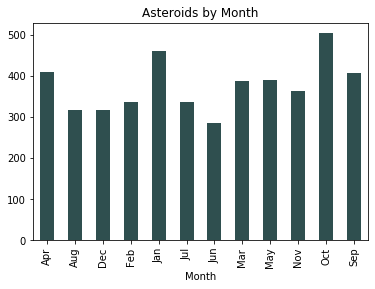

In [8]:
#determine how many asteroids there were each month. 
Asteroids_Months=single_asteroid.groupby("Month")

NumbyMonth=Asteroids_Months["ID"].nunique()


Asteroids_Months_plot=NumbyMonth.plot(kind="bar", title="Asteroids by Month", color="darkslategray")
Asteroids_Months_plot.set_xlabel=("Month")
Asteroids_Months_plot.set_ylabel=("Asteroid count")
plt.savefig("figs/Asteroids by Month")

In [9]:
#create a new df with only asteroids considered Potentially Hazardous 
Pos_Hazard=single_asteroid.loc[single_asteroid["Potentially Hazardous?"] == True]
Pos_Hazard

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.9,15.43,1/01/2019,0.62,0.28,True,1.14e+07,Earth
8,1/01/2019,Jan,1,2527715,527715 (2007 YQ56),19.9,15.43,1/01/2019,0.62,0.28,True,1.14e+07,Earth
32,3/01/2019,Jan,3,2357022,357022 (1999 YG3),19.0,25.90,3/01/2019,0.94,0.42,True,4.87e+07,Earth
38,4/01/2019,Jan,4,3263453,(2004 XP14),19.4,17.18,4/01/2019,0.78,0.35,True,1.09e+07,Earth
55,5/01/2019,Jan,5,2267729,267729 (2003 FC5),18.3,13.32,5/01/2019,1.30,0.58,True,3.72e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,26/12/2019,Dec,26,2310442,310442 (2000 CH59),19.9,12.27,26/12/2019,0.62,0.28,True,7.29e+06,Earth
4990,27/12/2019,Dec,27,2267221,267221 (2001 AD2),19.7,25.92,27/12/2019,0.68,0.31,True,2.10e+07,Earth
4996,28/12/2019,Dec,28,2136849,136849 (1998 CS1),17.6,32.01,28/12/2019,1.79,0.80,True,7.00e+07,Earth
5003,28/12/2019,Dec,28,3893728,(2019 WX4),21.0,17.72,28/12/2019,0.38,0.17,True,4.17e+07,Earth


In [10]:
#create stats for all potentially hazardous asteroids
mean_mag=Pos_Hazard["Absolute Magnitude"].mean()
count=Pos_Hazard["ID"].nunique()
mean_Rvel=Pos_Hazard["Relative Velocity (k/s)"].mean()
mean_dia=Pos_Hazard["Estimated Max Diameter"].mean()
max_mag=Pos_Hazard["Absolute Magnitude"].max()
max_Rvel=Pos_Hazard["Relative Velocity (k/s)"].max()
max_dia=Pos_Hazard["Estimated Max Diameter"].max()
min_miss_dis=Pos_Hazard["Miss Distance (km)"].min()
min_dia=Pos_Hazard["Estimated Max Diameter"].min()

In [11]:
#create a dateframe
PH_Table= pd.DataFrame([{"Potentially Hazardous": "Potentially Hazardous",
                         "Count": count,
            "Mean H": mean_mag,
           " Mean Relative Velocity (k/s)": mean_Rvel,
           "Mean Max Diameter (km)": mean_dia,
           "Max H": max_mag, 
           "Max Velocity (km/s)": max_Rvel, 
           "Max Diameter (km)": max_dia,
           "Min Diameter (km)": min_dia, 
           "Min Miss Distance (km)": min_miss_dis, 
                         }])
PH_Table

,Potentially Hazardous,Count,Mean H,Mean Relative Velocity (k/s),Mean Max Diameter (km),Max H,Max Velocity (km/s),Max Diameter (km),Min Diameter (km),Min Miss Distance (km)
0,Potentially Hazardous,409,20.31,17.92,0.67,22.2,45.74,5.18,0.22,1.44e+06


In [12]:
#export to csv
PH_Table.to_csv('PH.csv', index = False)

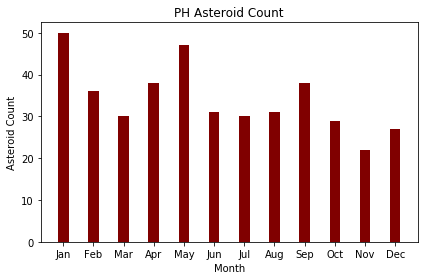

In [25]:
Months =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
PH_count = [50,36,30,38,47,31,30,31,38,29,22,27]
plt.bar(Months, PH_count, color="maroon", width=0.35 )
plt.title("PH Asteroid Count")
plt.xlabel("Month")
plt.ylabel("Asteroid Count")
plt.tight_layout();
plt.savefig("figs/PH Asteroids by Month")

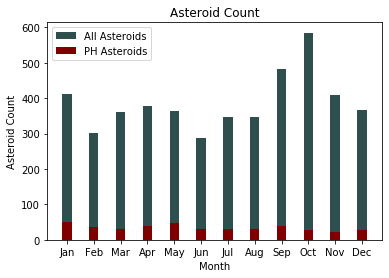

<Figure size 432x288 with 0 Axes>

In [14]:
#create a stacked bar chart of asteroid count to visulize how mnay are PH. 

Months =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
As_Count = [411, 301,361,377,365,288,346,348,483,585,408,367]
PH_count = [50,36,30,38,47,31,30,31,38,29,22,27]
width=0.35
fig, ax = plt.subplots()

ax.bar(Months, As_Count, width, label="All Asteroids", color="Darkslategray")
ax.bar(Months, PH_count, width, label="PH Asteroids" , color="maroon")
ax.set_ylabel("Asteroid Count")
ax.set_xlabel("Month")
ax.set_title("Asteroid Count")
ax.legend()
plt.show()

plt.savefig("figs/Asteroids_all")

In [15]:
#Determine # of Hazardous and number of regular asteroids for pie chart 
Haz_tru= Asteroids.loc[Asteroids["Potentially Hazardous?"]== True].count()
Haz_tru
Haz_false= Asteroids.loc[Asteroids["Potentially Hazardous?"]== False].count()
Haz_false
Haz_tru=461
Haz_false=4588

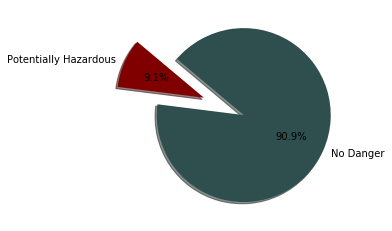

In [16]:
#create pie chart of how many potentially hazardous asteroids there
labels = ["Potentially Hazardous", "No Danger"]

# The values of each section of the pie chart
sizes = [461, 4588]

# The colors of each section of the pie chart
colors = ["maroon", "darkslategray"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (.5, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig("figs/Hazardous_pie")

The Correlation Coefficient is 0.22.
The Line regression is: y = 0.02x + 0.35.


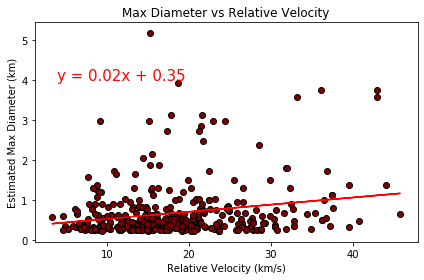

In [17]:
#create scatter plot of relative veolicty vs estimated max diameter

RV=Pos_Hazard["Relative Velocity (k/s)"]
MD=Pos_Hazard["Estimated Max Diameter"]
plt.scatter(Pos_Hazard["Relative Velocity (k/s)"], Pos_Hazard["Estimated Max Diameter"], color="maroon", edgecolors="black")
plt.xlabel("Relative Velocity (km/s)")
plt.ylabel("Estimated Max Diameter (km)")
plt.title("Max Diameter vs Relative Velocity")


plt.savefig("figs/Max Diameter vs Relative Velocity")

#coefficient calc
cor_coef=(round(st.pearsonr(RV, MD)[0],2))
print(f"The Correlation Coefficient is {cor_coef}.")


#line regression calcs
(slope, intercept, rvalue, pvalue, stderr) = linregress(RV, MD)
regress_values = RV * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The Line regression is: {line_eq}.")

#tidying plot 
plt.plot(RV,regress_values,"r-")
plt.annotate(line_eq,(4,4),fontsize=15,color="red")
plt.tight_layout()


plt.savefig("figs/Max Diameter vs Relative Velocity_R")



In [18]:
Largest_Asteroid=Pos_Hazard.loc[Pos_Hazard["Estimated Max Diameter"]== max_dia]
Largest_Asteroid
Largest_Asteroid.to_csv("Largest.csv", index = False)

The Correlation Coefficient is 0.13.
The Line regression is: y = 0.0x + 0.51.


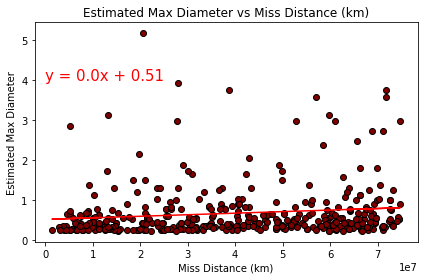

In [19]:
x=Pos_Hazard["Miss Distance (km)"]
y=Pos_Hazard["Estimated Max Diameter"]

plt.scatter(Pos_Hazard["Miss Distance (km)"], Pos_Hazard["Estimated Max Diameter"], color="maroon", edgecolors="black")
plt.xlabel("Miss Distance (km)")
plt.ylabel("Estimated Max Diameter")
plt.title("Estimated Max Diameter vs Miss Distance (km)")
plt.savefig("figs/Estimated Max Diameter vs Miss Distance (km)")

#coefficient calc
cor_coef=(round(st.pearsonr(x, y)[0],2))
print(f"The Correlation Coefficient is {cor_coef}.")


#line regression calcs
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The Line regression is: {line_eq}.")

#tidying plot 
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(4,4),fontsize=15,color="red")
plt.tight_layout()


plt.savefig("figs/Estimated Max Diameter vs Miss Distance_km_R")

The Correlation Coefficient is 0.26.
The Line regression is: y = 0.0x + 14.26.


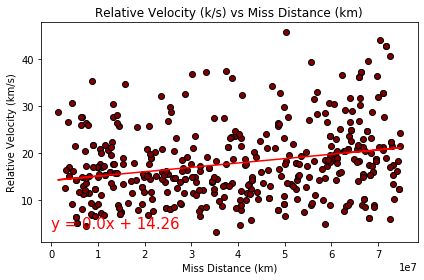

In [20]:
x1=Pos_Hazard["Miss Distance (km)"]
y1=Pos_Hazard["Relative Velocity (k/s)"]
plt.scatter(Pos_Hazard["Miss Distance (km)"], Pos_Hazard["Relative Velocity (k/s)"], color="maroon", edgecolors="black")
plt.xlabel("Miss Distance (km)")
plt.ylabel("Relative Velocity (km/s)")
plt.title("Relative Velocity (k/s) vs Miss Distance (km)")
plt.savefig("figs/Relative Velocity (km_s) vs Miss Distance (km)")


#coefficient calc
cor_coef=(round(st.pearsonr(x1, y1)[0],2))
print(f"The Correlation Coefficient is {cor_coef}.")


#line regression calcs
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1,y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The Line regression is: {line_eq}.")

#tidying plot 
plt.plot(x1,regress_values,"r-")
plt.annotate(line_eq,(4,4),fontsize=15,color="red")
plt.tight_layout()


plt.savefig("figs/Relative Velocity km_s vs Miss Distance km")